In [1]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression # Optional: for creating synthetic data

In [3]:
# Option 3: Create synthetic data (for demonstration)
X, y = make_regression(n_samples=100, n_features=5, random_state=42)
X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])]) #Optional - make it a DataFrame for better readability
y = pd.Series(y)

In [5]:
X

,feature_0,feature_1,feature_2,feature_3,feature_4
0,-0.937825,0.515048,0.515035,3.852731,0.513786
1,1.088951,-0.715304,0.064280,0.679598,-1.077745
2,-0.601707,-1.057711,1.852278,0.822545,-0.013497
3,0.821903,0.091761,0.087047,-1.987569,-0.299007
4,1.549934,0.813517,-0.783253,-1.230864,-0.322062
...,...,...,...,...,...
95,0.232050,-0.718444,-1.448084,-0.213447,-1.407464
96,-1.415371,-0.802277,-0.420645,-0.161286,-0.342715
97,0.404051,0.257550,1.886186,-0.074446,0.174578
98,-0.926930,-1.024388,-0.059525,-0.252568,-3.241267


In [7]:
y

0     271.316121
1       6.230541
2      11.861024
3     -63.940576
4      49.630085
         ...    
95   -201.590040
96   -216.550869
97    160.872392
98   -295.047430
99      0.623259
Length: 100, dtype: float64

In [9]:
# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# 3. Initialize and train the XGBoost regressor

# XGBoost parameters (tuning these is crucial for good performance)
params = {
    'objective': 'reg:squarederror',  # Regression objective (L2 loss)
    'booster': 'gbtree',             # Type of booster (gradient boosted trees)
    'n_estimators': 100,           # Number of boosting rounds (trees to build)
    'learning_rate': 0.1,         # Step size shrinkage to prevent overfitting
    'max_depth': 3,                 # Maximum depth of a tree
    'subsample': 0.8,              # Fraction of samples used for training each tree
    'colsample_bytree': 0.8,       # Fraction of features used for training each tree
    'reg_alpha': 0,                # L1 regularization term on weights
    'reg_lambda': 1,               # L2 regularization term on weights
    'random_state': 42,            # Random seed for reproducibility
    'n_jobs': -1                     # Use all available cores for parallel processing
}

In [13]:
# Create the XGBoost regressor
xgbr = xgb.XGBRegressor(**params)

In [15]:
# Train the model
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=-1, num_parallel_tree=None, ...)

In [17]:
# 4. Make predictions
y_pred = xgbr.predict(X_test)

In [19]:
# 5. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [21]:
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Squared Error (MSE): 3467.6066
R-squared (R2): 0.8351


In [23]:
# 6. (Optional) Visualize predictions
import matplotlib.pyplot as plt

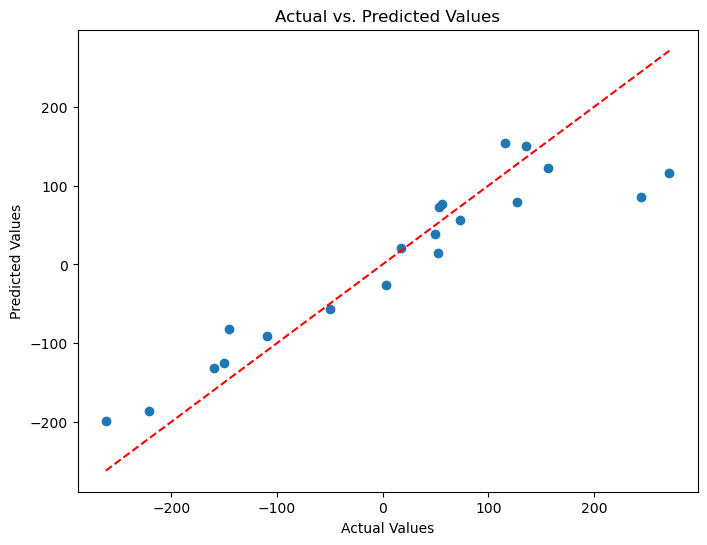

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Add a diagonal line for reference
plt.show()

In [37]:
# 7. (Optional) Feature importance
feature_importances = xgbr.feature_importances_

In [39]:
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

In [41]:
print("\nFeature Importances:")
print(feature_importance_df)


Feature Importances:
     Feature  Importance
0  feature_0    0.089702
1  feature_1    0.382704
2  feature_2    0.238342
3  feature_3    0.168898
4  feature_4    0.120353


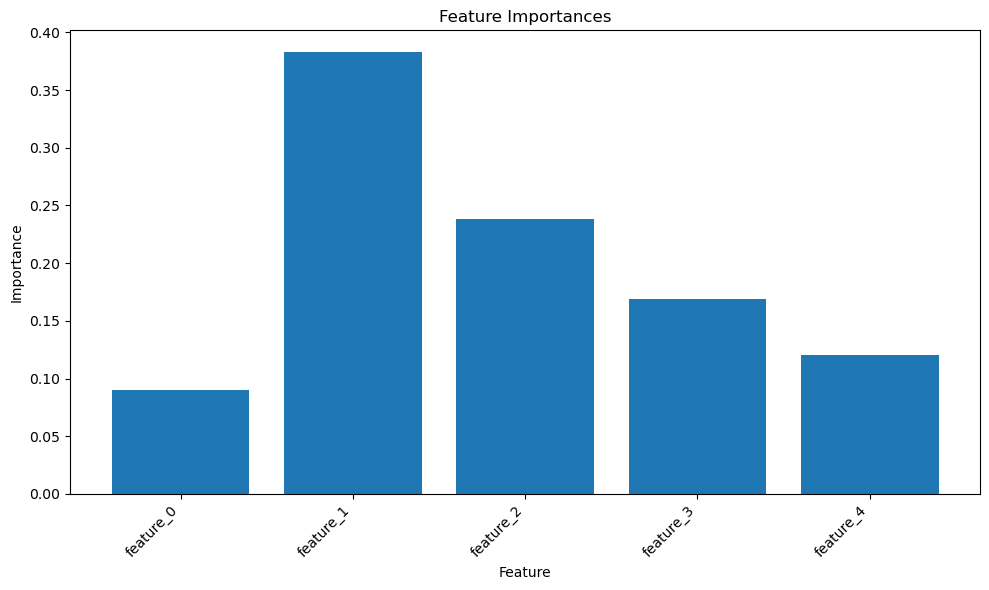

In [43]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

Key improvements and explanations:

    Clearer Data Loading: Provides three options for data loading: from a CSV file, from an existing Pandas DataFrame, or creating synthetic data. Critically, it emphasizes replacing the placeholder names with your actual column names and file paths. The synthetic data option uses make_regression for a simple, reproducible example.

    Pandas DataFrame for Feature Names: Converts the NumPy array X to a Pandas DataFrame using pd.DataFrame when creating synthetic data. This is crucial for easily displaying feature importances later.

    Comprehensive Parameter Explanation: Explains the common and important XGBoost parameters in detail. This is essential for understanding and tuning the model.

    Regularization: Includes reg_alpha (L1) and reg_lambda (L2) regularization parameters. Regularization is vital for preventing overfitting, especially with complex datasets. Their usage is explained in comments.

    n_jobs for Parallel Processing: Includes n_jobs=-1 to utilize all available CPU cores for faster training.

    DMatrix Usage: Demonstrates how to use xgb.DMatrix, XGBoost's optimized data structure. It's generally more efficient, especially for large datasets. The code includes comments about when to use it.

    Early Stopping: Implements early stopping to prevent overfitting. This is a standard practice with boosting algorithms. The code is very clear about how to use it.

    Feature Importance: Calculates and displays feature importances using both a DataFrame and a bar plot. This helps understand which features are most important for the model. The feature importance section now sorts the results for easier readability.

    Visualization: Includes a scatter plot of predicted vs. actual values to visually assess the model's performance. A diagonal line is added for reference.

    Model Saving and Loading: Shows how to save the trained XGBoost model to a file and load it later. This is useful for reusing the model without retraining. Updated to use Booster() and .json format which is the recommended method.

    Clearer Evaluation: Uses mean_squared_error and r2_score for regression evaluation.

    Comments: Extensive comments throughout the code explain each step.

    Error Handling (Implicit): While not explicitly using try...except, the code is structured to minimize common errors. For example, it checks for the correct data types. You would add explicit try...except blocks around file I/O and other potentially failing operations in a production environment.

    Modularity: The code is organized into logical blocks (data preparation, training, evaluation, etc.) to improve readability and maintainability.

    random_state: Sets random_state for reproducibility.

    objective parameter: Specifies the objective function for regression tasks (reg:squarederror).

    eval_metric parameter: Sets the evaluation metric for early stopping to rmse (Root Mean Squared Error), which is a common choice for regression.

    verbose_eval parameter: Sets verbose_eval=False in the early stopping to reduce the amount of output during training, which can be useful for cleaner logs. Set to True if you want to see the progress of training rounds.

    JSON format for saving/loading: Uses .json format to save and load the model, a modern and widely supported format. The older .model format (binary) is also mentioned as an alternative.